# DALL-E

version `1.1.1`

In [1]:
import os
from io import BytesIO
from PIL import Image
import abcli
from abcli import file
from abcli.modules.cookie import cookie
from abcli import string
from abcli.modules import objects
from openai_cli.DALLE.canvas import Canvas
import abcli.logging
import logging

logger = logging.getLogger()

Found credentials in shared credentials file: ~/.aws/credentials


In [2]:
os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
success, content = file.load_text(objects.path_of("private.txt"))
logger.info(f"load {len(content)} line(s) of text.")

load 151 line(s) of text.


In [4]:
canvas = Canvas()
canvas.log()

Canvas: 1,024x2,048, brush: 256x256, @ 512x1,024


NumExpr defaulting to 8 threads.
Canvas.generate: received https://oaidalleapiprodscus.blob.core.windows.net/private/org-1RdONq0eTlgUUnFpmb7DZuWr/user-id8j8e4QMrQ8PpTpUxwnF9Cr/img-eEEfXOKoVX4Vj3AXab19g19T.png?st=2023-03-05T22%3A12%3A08Z&se=2023-03-06T00%3A12%3A08Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-03-05T02%3A37%3A47Z&ske=2023-03-06T02%3A37%3A47Z&sks=b&skv=2021-08-06&sig=A/r6QLNhQa8waE6Z/JMheg%2B4AmRyYq%2BTzjd/HYkGmN8%3D
Canvas.generate: downloaded (256, 256), RGB


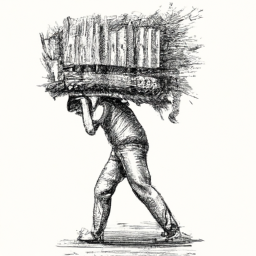

In [5]:
canvas.generate(content[0])

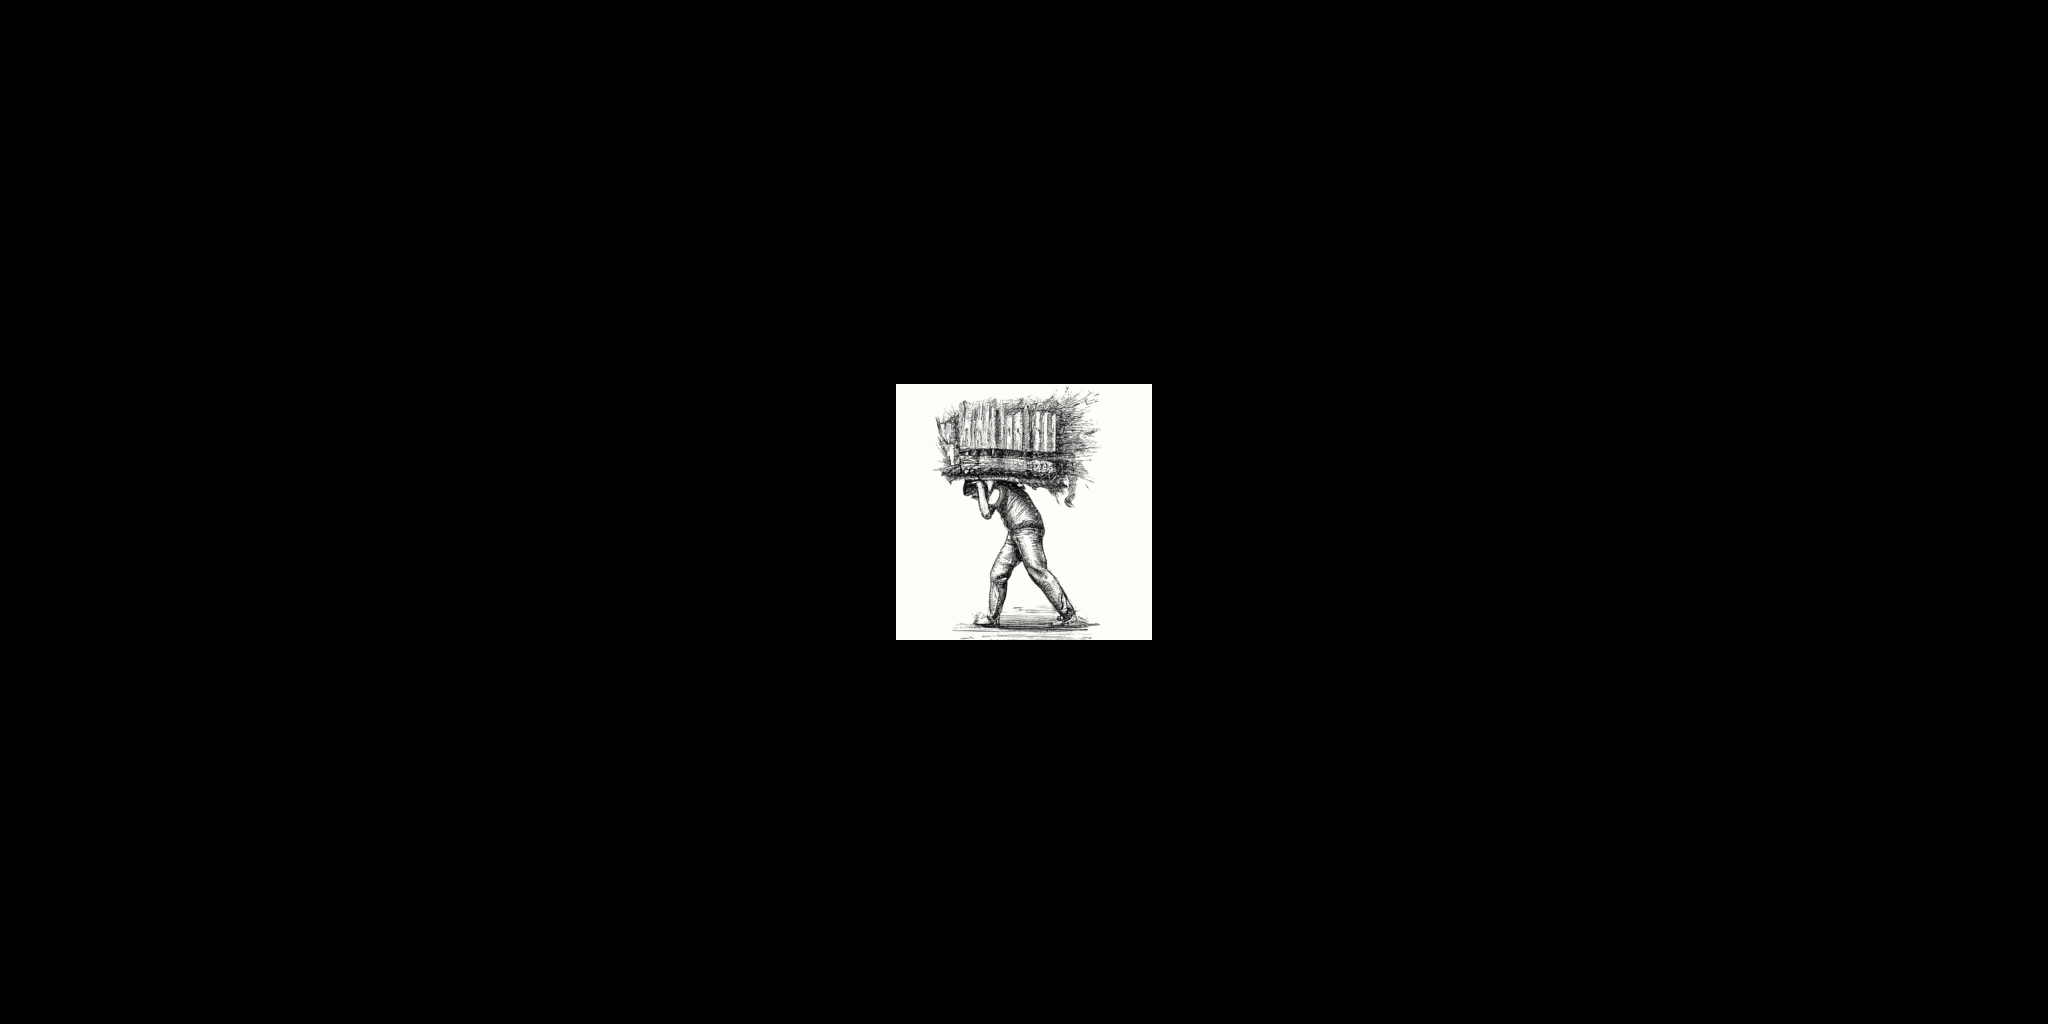

In [6]:
canvas.image

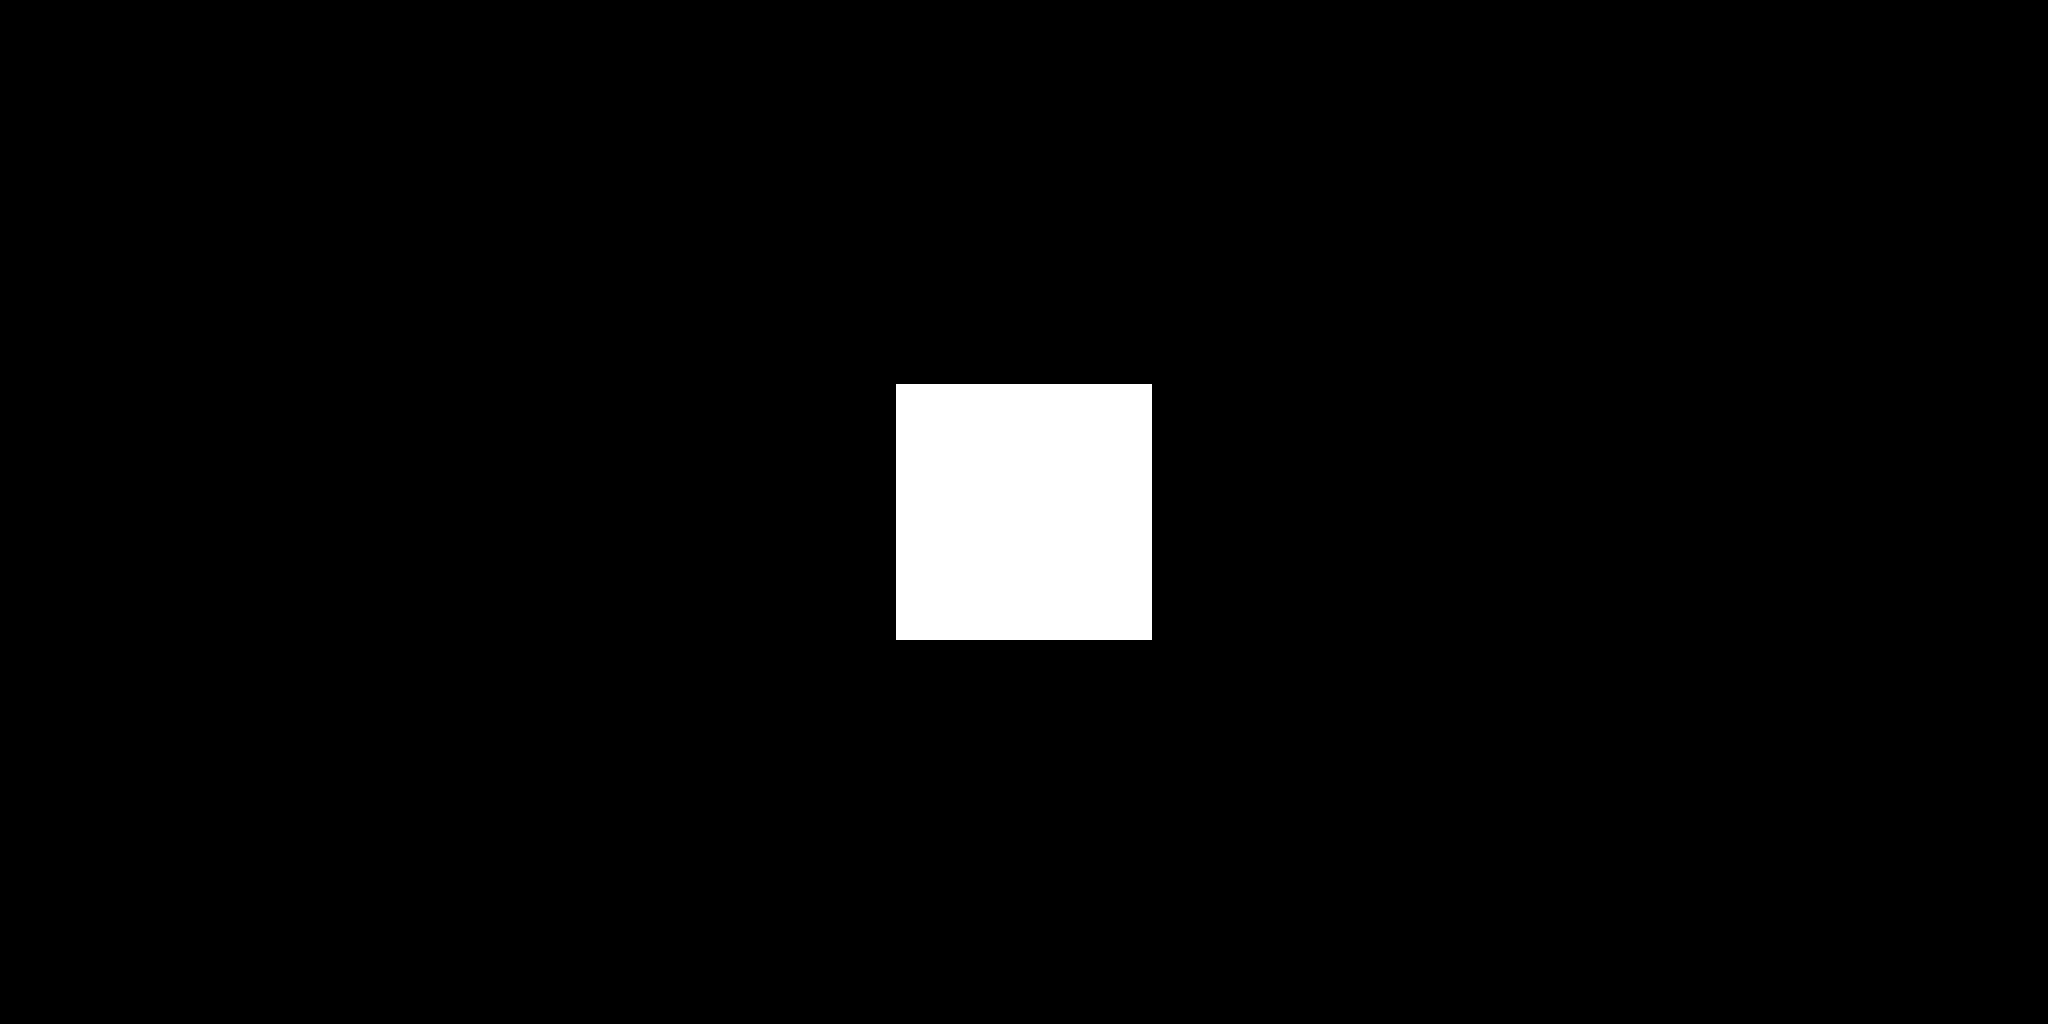

In [7]:
canvas.mask

---

In [8]:
# END